Einladen der Datensätze: 

In [55]:
data_dresden <- read.csv2(file = "produkt_rr_stunde_20200925_20220328_01051.csv", header = TRUE)
data_hamburg <- read.csv2(file = "produkt_rr_stunde_20200925_20220328_01975.csv", header = TRUE)

Entfernen der fehlerhaften Daten: 

In [56]:
data_hamburg <- subset(data_hamburg, WRTR > -999)

Histogramm der Station Dresden: 

[1] "Anzahl der Klassen = 19"
[1] "Die Klassenbreite beträgt 1"


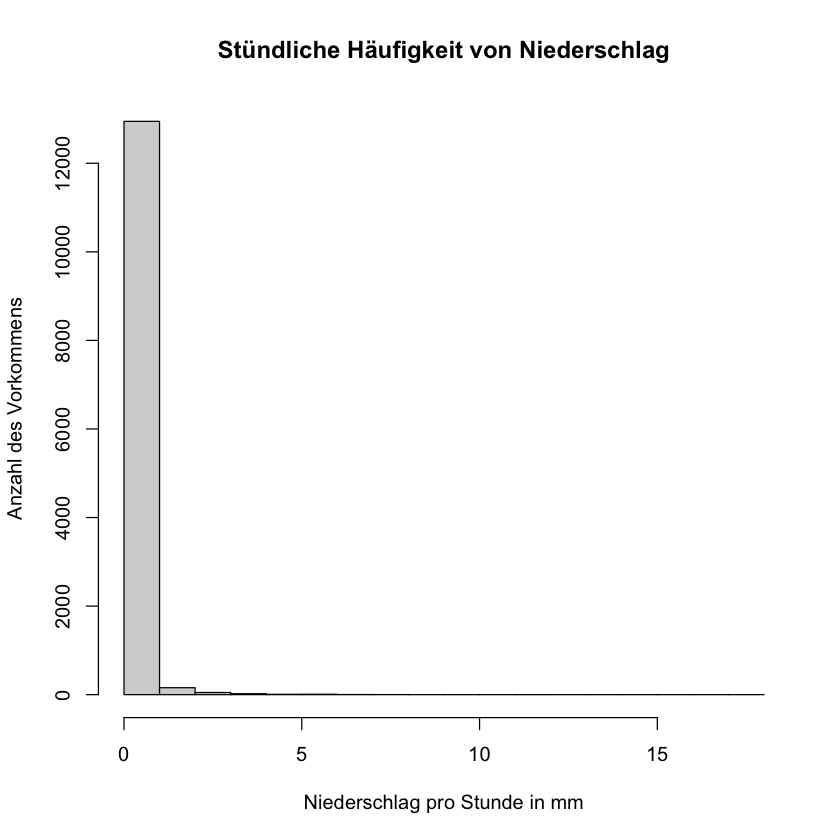

In [57]:
data_hamburg[,4] <- as.numeric(data_hamburg$R1)
data_dresden[,4] <- as.numeric(data_dresden$R1)    #Transform data from character to numeric
hist(data_dresden$R1, main = "Stündliche Häufigkeit von Niederschlag", xlab = "Niederschlag pro Stunde in mm", ylab = "Anzahl des Vorkommens")
hist_dresden <- hist(data_dresden$R1, main = "Stündliche Häufigkeit von Niederschlag", xlab = "Niederschlag pro Stunde in mm", ylab = "Anzahl des Vorkommens")
print(paste("Anzahl der Klassen =", length(hist_dresden$breaks)))
print(paste("Die Klassenbreite beträgt", hist_dresden$breaks[2]-hist_dresden$breaks[1]))

Relative Histogramme: 

In [58]:
data_hamburg_filter <- subset(data_hamburg, R1 < 3&R1 > 0.1)  #filtering the niederschlag between 0.1 und 3mm
data_dresden_filter <- subset(data_dresden, R1 < 3&R1 > 0.1)

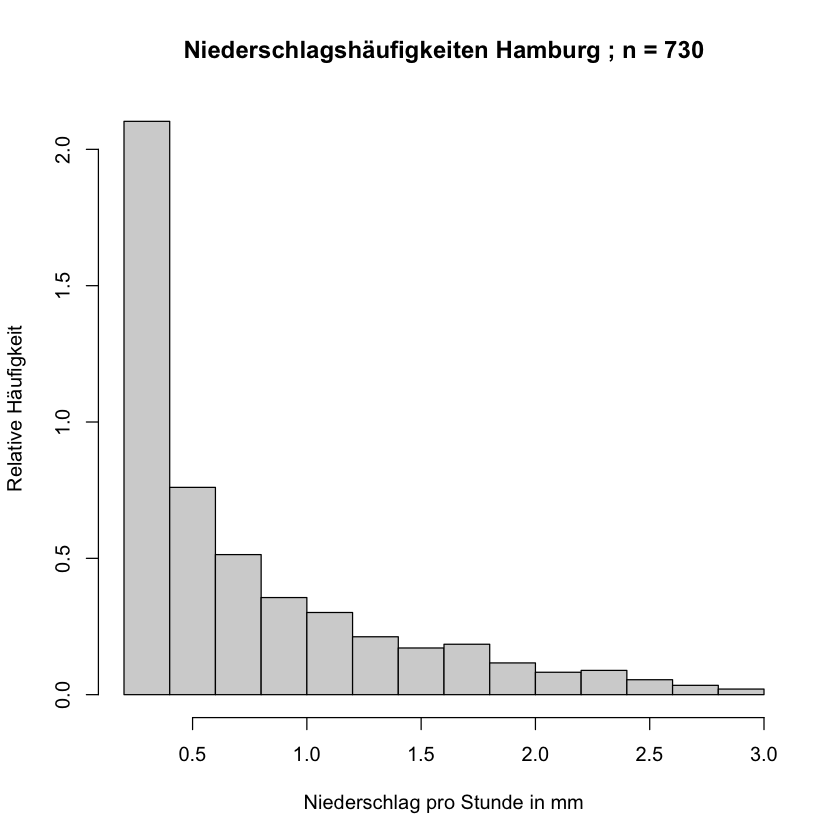

In [59]:
hist(data_hamburg_filter$R1, main = paste("Niederschlagshäufigkeiten Hamburg ; n =", length(data_hamburg_filter$R1)), xlab = "Niederschlag pro Stunde in mm", ylab = "Relative Häufigkeit", freq = F)
hist_hamburg2 <- hist(data_hamburg_filter$R1, main = paste("Niederschlagshäufigkeiten Hamburg ; n =", length(data_hamburg_filter$R1)), xlab = "Niederschlag pro Stunde in mm", ylab = "Relative Häufigkeit", freq = F)

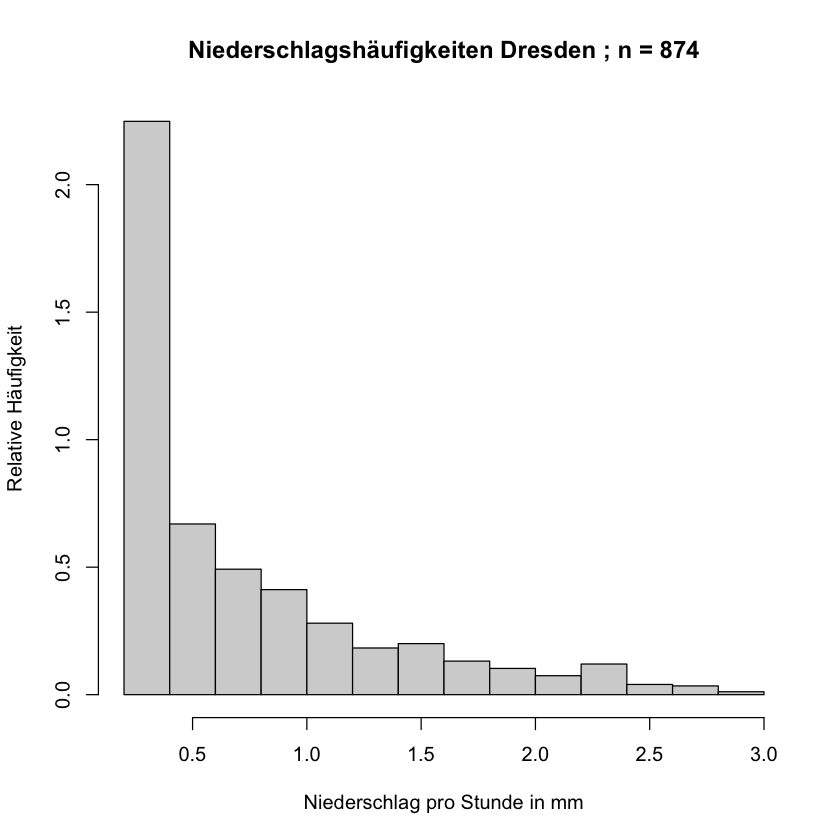

In [60]:
hist(data_dresden_filter$R1, main = paste("Niederschlagshäufigkeiten Dresden ; n =", length(data_dresden_filter$R1)), xlab = "Niederschlag pro Stunde in mm", ylab = "Relative Häufigkeit", freq = F)
hist_dresden2 <- hist(data_dresden_filter$R1, main = paste("Niederschlagshäufigkeiten Dresden ; n =", length(data_dresden_filter$R1)), xlab = "Niederschlag pro Stunde in mm", ylab = "Relative Häufigkeit", freq = F)

Schleife für die Klasse mit den größten absoluten Häufigkeiten aus dem darüber erzeugten Histogramm für Dresden: 

In [61]:
maxCounts <- 0     # for Dresden
maxClass <- 0
i <- 0

for (i in 1:(length(hist_dresden2$breaks)-1)) {
    
    if (maxCounts < hist_dresden2$counts[i]) {
        maxCounts <- hist_dresden2$counts[i]
        maxClass <- i
    }
    i+1
}
print(paste("Die Klasse mit den meisten Einträgen ist die Klasse", maxClass, "mit", maxCounts, "Einträgen"))

[1] "Die Klasse mit den meisten Einträgen ist die Klasse 1 mit 393 Einträgen"


In [62]:
maxCounts <- 0      #for Hamburg
maxClass <- 0
i <- 0

for (i in 1:(length(hist_hamburg2$breaks)-1)) {
    
    if (maxCounts < hist_hamburg2$counts[i]) {
        maxCounts <- hist_hamburg2$counts[i]
        maxClass <- i
    }
    i+1
}
print(paste("Die Klasse mit den meisten Einträgen ist die Klasse", maxClass, "mit", maxCounts, "Einträgen"))

[1] "Die Klasse mit den meisten Einträgen ist die Klasse 1 mit 307 Einträgen"
